         : Google Trends Analyzer & Career Path Recommender

pytrend connected successfully
          date  Python  Artificial Intelligence  Machine learning  Cloud Computing  Data science  isPartial
0   2024-08-11      84                        6                10                4             9      False
1   2024-08-18      90                        7                11                4            10      False
2   2024-08-25      93                        8                10                4            10      False
3   2024-09-01      94                        6                10                4             9      False
4   2024-09-08      89                        7                10                4             9      False
5   2024-09-15      93                        7                10                4             9      False
6   2024-09-22      91                        7                11                5             9      False
7   2024-09-29      79                        6                 9                4             8      Fal

c:\Users\Vikash\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


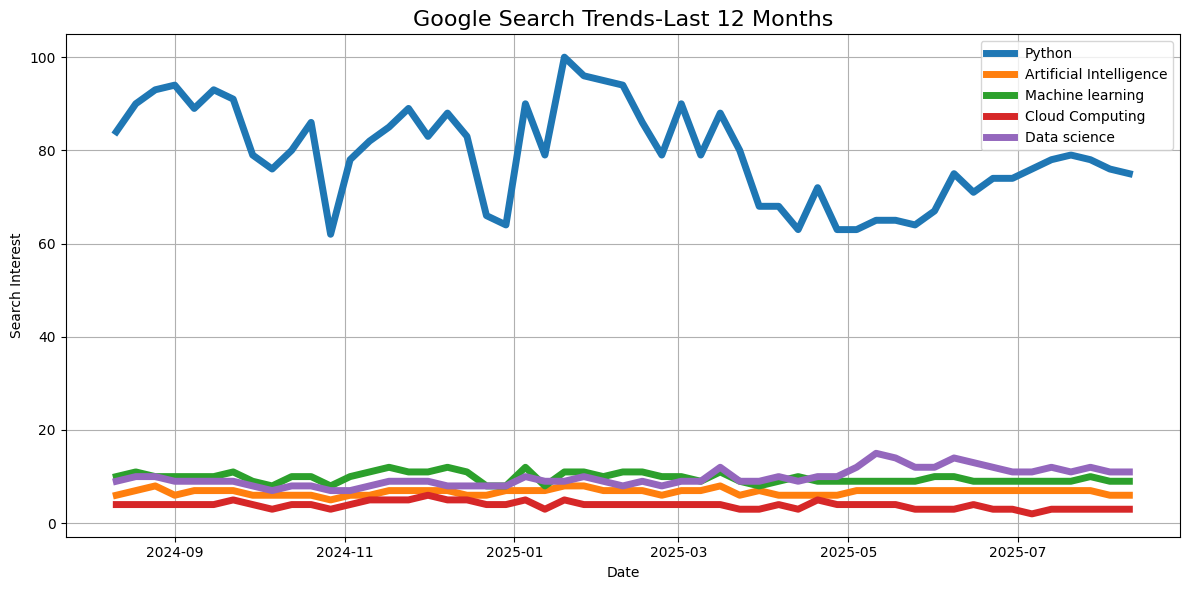

In [3]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

#Create the connection of pytrends
pytrends=TrendReq(hl='en-us',tz=330)
print('pytrend connected successfully')

#Keywords
keywords=['Python','Artificial Intelligence','Machine learning','Cloud Computing','Data science']

#get the trend with build_payload()
pytrends.build_payload(kw_list=keywords,geo='IN',timeframe='today 12-m')

# to Fetch live data ,interest_over_time()
Data=pytrends.interest_over_time()

#Check th CSV data
# print(Data.head())

#convert into CSV
Data.to_csv('google_trend_data.csv')

# read the Data
Data=pd.read_csv('google_trend_data.csv')
print(Data.to_string())

#Remove unwanted columns
if'isPartial' in Data.columns:
    Data=Data.drop(columns=['isPartial'])
    Data['date']=pd.to_datetime(Data['date'])

# Matplotlib
#figure size of graph
plt.figure(figsize=(12,6))
for column in Data.columns[1:]:
    plt.plot(Data['date'], Data[column],linewidth=5, label=column)

plt.title("Google Search Trends-Last 12 Months",fontsize=16)
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


pie chart


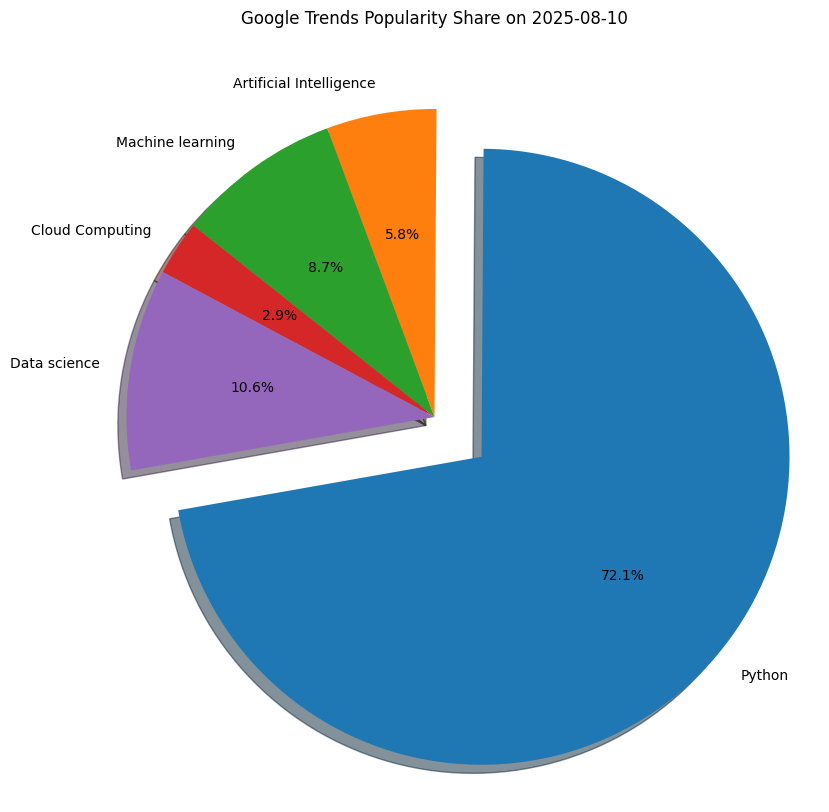

In [ ]:
import matplotlib.pyplot as plt

# Latest date ka data lena
latest_row = Data.iloc[-1]

# Skills ke columns (date ke alawa)
skills = Data.columns[1:]

# Values for those skills
values = latest_row[skills]
explode=[0.2,0,0,0,0]
# Pie chart banana
plt.figure(figsize=(10,10))
plt.pie(values, labels=skills,explode=explode, autopct='%1.1f%%', startangle=190, shadow=True)
plt.title(f'Google Trends Popularity Share on {latest_row["date"].date()}')
plt.show()
